In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('./drive/My Drive/amazon_food_reviews')

In [3]:
!pip install numpy==1.16.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     |████████████████████████████████| 17.3MB 3.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from collections import Counter
from tqdm import tqdm

In [0]:
x_train_cv = np.load('x_train_cv.npy')
x_test_cv =  np.load('x_test_cv.npy')
x_train_tfidf = np.load('x_train_tfidf.npy')
x_test_tfidf = np.load('x_test_tfidf.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [6]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3772, 3728]))

In [0]:
neighbors = list(range(1,40,2))
cv_scores = []

## BoW approach

In [8]:
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
  scores = cross_val_score(knn, x_train_cv, y_train, cv=10, scoring='accuracy')
  print(scores.mean())
  cv_scores.append(scores.mean())

0.6225371432364029
0.6145376787040214
0.6033426489054499
0.6021417583557186
0.6010765139138026
0.6033446009089202
0.6138832756443419
0.6237479936260627
0.6336143161143397
0.6448120095028317
0.6498790383627349
0.656414691107599
0.6553464232529007
0.6593451790432813
0.6594760239573759
0.6613430466543051
0.6612098908620283
0.6614785137988395
0.6596127334152297
0.6628114929982097


In [0]:
optimal_k_bow = neighbors[cv_scores.index(max(cv_scores))]

In [10]:
optimal_k_bow

39

In [0]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_bow)
# fitting the model
knn_optimal.fit(x_train_cv, y_train)
# predict the response
y_pred_cv = knn_optimal.predict(x_test_cv)


In [12]:
# Accuracy on train data
train_acc_bow = knn_optimal.score(x_train_cv, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 0.6868


In [13]:
# evaluate accuracy on test data
acc_bow = accuracy_score(y_test, y_pred_cv)
print('\nThe accuracy of the knn classifier for k = %d is %.3f' % (optimal_k_bow, acc_bow))


The accuracy of the knn classifier for k = 39 is 0.660


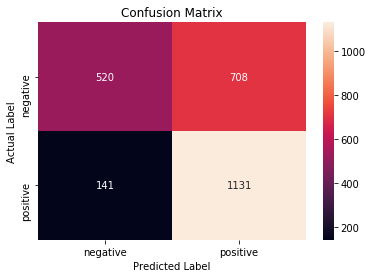

In [14]:

# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_cv)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [15]:

# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

         0.0       0.79      0.42      0.55      1228
         1.0       0.62      0.89      0.73      1272

    accuracy                           0.66      2500
   macro avg       0.70      0.66      0.64      2500
weighted avg       0.70      0.66      0.64      2500



In [0]:
from sklearn.metrics import roc_curve,auc

In [0]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_cv,pos_label=1)

In [29]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6563018560629341

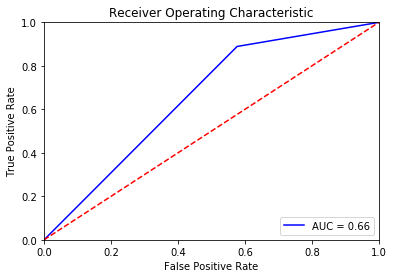

In [30]:

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Tf-Idf vectorizer

In [16]:
neighbors = list(range(1,40,2))
cv_scores = []

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
  scores = cross_val_score(knn, x_train_tfidf, y_train, cv=10, scoring='accuracy')
  print(scores.mean())
  cv_scores.append(scores.mean())

0.5041320910200136
0.49973333238518347
0.49773315389597733
0.5053327978657147
0.5320106785375025
0.5830738308868104
0.6156013191134562
0.6380018697514722
0.6608022428484318
0.6745363019904628
0.6826676847425506
0.6865345336910229
0.6963997866662874
0.7030652129159342
0.704665213390009
0.7109324212131933
0.7165315335079114
0.7207987370644214
0.7246638077578804
0.7259989183980772


In [0]:
optimal_k_bow = neighbors[cv_scores.index(max(cv_scores))]

In [18]:
optimal_k_bow

39

In [0]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_bow)
# fitting the model
knn_optimal.fit(x_train_tfidf, y_train)
# predict the response
y_pred_tfidf = knn_optimal.predict(x_test_tfidf)


In [20]:
# Accuracy on train data
train_acc_bow = knn_optimal.score(x_train_tfidf, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 0.7450666666666667


In [21]:
# evaluate accuracy on test data
acc_bow = accuracy_score(y_test, y_pred_tfidf)
print('\nThe accuracy of the knn classifier for k = %d is %.3f' % (optimal_k_bow, acc_bow))


The accuracy of the knn classifier for k = 39 is 0.735


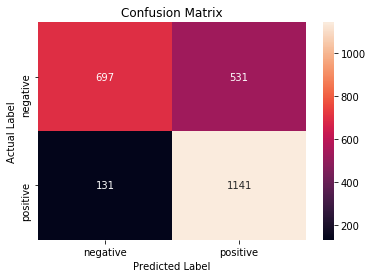

In [22]:

cm = confusion_matrix(y_test, y_pred_tfidf)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [23]:

# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68      1228
         1.0       0.68      0.90      0.78      1272

    accuracy                           0.74      2500
   macro avg       0.76      0.73      0.73      2500
weighted avg       0.76      0.74      0.73      2500



In [0]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_tfidf,pos_label=1)

In [32]:
roc_auc = auc(fpr, tpr)
roc_auc

0.7323010775817917

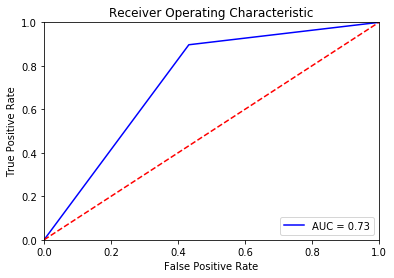

In [33]:

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [0]:
x_train_w2v_av = np.load('x_train_w2v_av.npy')
x_test_w2v_av =  np.load('x_test_w2v_av.npy')
x_train_w2v_tf = np.load('x_train_w2v_tf.npy')
x_test_w2v_tf = np.load('x_test_w2v_tf.npy')


## Avg Word2Vec

In [35]:
neighbors = list(range(1,40,2))
cv_scores = []

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
  scores = cross_val_score(knn, x_train_w2v_av, y_train, cv=10, scoring='accuracy')
  print(scores.mean())
  cv_scores.append(scores.mean())

0.6959988913758068
0.7294630980677299
0.747731911819695
0.7563953832214221
0.7615978787517845
0.7625299688236483
0.7655973475508402
0.7629301435202551
0.764663299786607
0.7677321021607741
0.7703980596113653
0.7694682818399086
0.7689319279382423
0.7697299721421728
0.7702636600835439
0.7711964598455582
0.7735959281705389
0.7743957534739321
0.7751946882275939
0.7743939737966942


In [0]:
optimal_k_bow = neighbors[cv_scores.index(max(cv_scores))]

In [37]:
optimal_k_bow

37

In [0]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_bow)
# fitting the model
knn_optimal.fit(x_train_w2v_av, y_train)
# predict the response
y_pred_w2v_av = knn_optimal.predict(x_test_w2v_av)


In [43]:
# Accuracy on train data
train_acc_bow = knn_optimal.score(x_train_w2v_av, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 0.7917333333333333


In [44]:
# evaluate accuracy on test data
acc_bow = accuracy_score(y_test, y_pred_w2v_av )
print('\nThe accuracy of the knn classifier for k = %d is %.3f' % (optimal_k_bow, acc_bow))


The accuracy of the knn classifier for k = 37 is 0.768


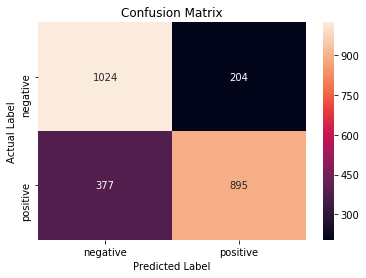

In [45]:

cm = confusion_matrix(y_test, y_pred_w2v_av)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [46]:

# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_w2v_av))

              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78      1228
         1.0       0.81      0.70      0.75      1272

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500



In [48]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_w2v_av,pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.7687462868498146

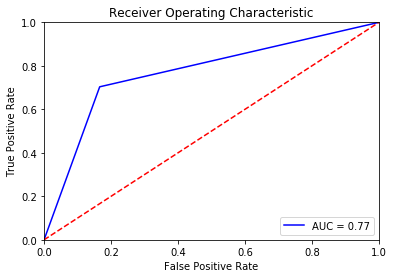

In [49]:

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Tf-Idf weighted Word2Vec

In [50]:
neighbors = list(range(1,40,2))
cv_scores = []

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
  scores = cross_val_score(knn, x_train_w2v_tf, y_train, cv=10, scoring='accuracy')
  print(scores.mean())
  cv_scores.append(scores.mean())

0.6417377014596174
0.6710712289266292
0.6897400441008192
0.6964072509758535
0.7042724982622192
0.7049359658713467
0.7120037077399248
0.7100045978155813
0.710535796389564
0.7086684152919975
0.7094661039397404
0.7092035235618196
0.7116013911728436
0.711201573928724
0.7110687732185599
0.7080017457808814
0.7117372181402397
0.7149382843347277
0.7136045959192816
0.7153368635322018


In [0]:
optimal_k_bow = neighbors[cv_scores.index(max(cv_scores))]

In [52]:
optimal_k_bow

39

In [0]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_bow)
# fitting the model
knn_optimal.fit(x_train_w2v_tf, y_train)
# predict the response
y_pred_w2v_tf = knn_optimal.predict(x_test_w2v_tf)


In [57]:
# Accuracy on train data
train_acc_bow = knn_optimal.score(x_train_w2v_tf, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 0.7372


In [56]:
# evaluate accuracy on test data
acc_bow = accuracy_score(y_test, y_pred_w2v_tf )
print('\nThe accuracy of the knn classifier for k = %d is %.3f' % (optimal_k_bow, acc_bow))


The accuracy of the knn classifier for k = 39 is 0.710


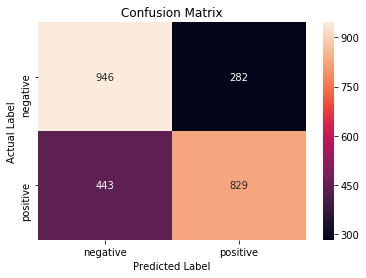

In [58]:

cm = confusion_matrix(y_test, y_pred_w2v_tf)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [59]:

# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_w2v_tf))

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72      1228
         1.0       0.75      0.65      0.70      1272

    accuracy                           0.71      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.71      0.71      0.71      2500



In [60]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_w2v_tf,pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.7110439329686764

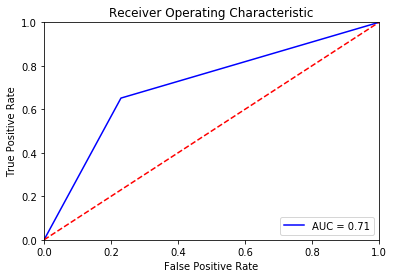

In [61]:

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
